In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123489)

In [2]:
def num_euler_maruyama(f, g, bt):
    X = np.zeros((N, 1))
    X[0] = X0
    dt = 1/ N
    for i in range(1, N):
        # dbt = np.sqrt(dt) * np.random.normal()
        dbt = bt[i] - bt[i-1]
        X1 = X[i-1]
        X[i] = X1 + X1*f(X1)*dt + X1*g(X1)*dbt
    return X

def teorica(f, g, bt):#f, g, bt):
    X = np.zeros((N, 1))
    X[0] = X0
    dt = 1/ N
    for i in range(1, N):
        # dbt = np.sqrt(dt) * np.random.normal()
        ti = i*dt
        X[i] = X0*np.exp( (f(X0) - 1/2*g(X0)**2) * ti + g(X0)*bt[i])
    return X

def num_milstein(f, g, gp, bt):
    X = np.zeros((N, 1))
    X[0] = X0
    dt = 1/ N
    for i in range(1, N):
        # dbt = np.sqrt(dt) * np.random.normal()
        dbt = bt[i] - bt[i-1]
        X1 = X[i-1]
        X[i] = X1 + X1*f(X1)*dt + X1*g(X1)*dbt + \
                1/2 * gp(X1)*g(X1)*(dbt**2 - dt)
    return X


In [3]:
N = 500
MU = 1.5
SIGMA = 2.5
X0 = 1

dt = 1/ N
# Brownian movement
bt = np.sqrt(dt) * np.random.normal(size=N)
bt = np.cumsum(bt)

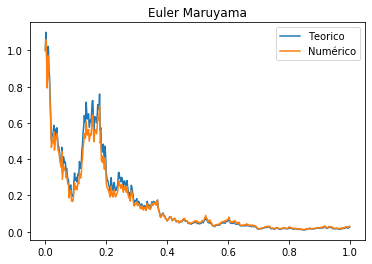

In [4]:
f = lambda x: MU
g = lambda x: SIGMA
# f = lambda x: .5*np.sin(x)
# g = lambda x: .2


X_teo = teorica(f, g, bt)
X_num = num_euler_maruyama(f, g, bt)
t = np.linspace(0, 1, N)
# Plot
plt.plot(t, X_teo, label='Teorico')
plt.plot(t, X_num, label='Numérico')
plt.title('Euler Maruyama')
plt.legend()

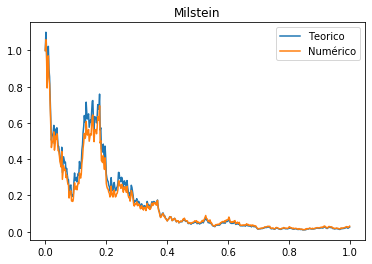

In [5]:
f = lambda x: MU
g = lambda x: SIGMA
gp = lambda x: 0

X_teo = teorica(f, g, bt)
X_num = num_milstein(f, g, gp, bt)
t = np.linspace(0, 1, N)

# Plot
plt.plot(t, X_teo, label='Teorico')
plt.plot(t, X_num, label='Numérico')
plt.title('Milstein')
plt.legend()